In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn import metrics
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures
import warnings
from sklearn import preprocessing
from sklearn.linear_model import SGDClassifier
from sklearn.metrics.classification import accuracy_score, log_loss
warnings.filterwarnings('ignore')

In [2]:
data =pd.read_excel('CTG.xls',"Raw Data")

In [3]:
dataset_rmvCol = data.drop(columns=['FileName', 'SegFile', 'Date'])

In [4]:
finaldata = dataset_rmvCol.dropna()


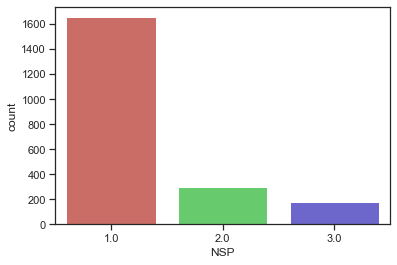

In [5]:
sns.countplot(x = 'NSP', data = finaldata, palette = 'hls')
plt.show()

In [6]:
X = finaldata[['b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV','DL', 'DS', 'DP', 'DR', 'Width', 'Min', 'Max', 'Nmax','Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'CLASS']]
y = finaldata[['NSP']]


In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [8]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
y_pred=logreg.predict(X_test)

In [10]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[407,   2,   1],
       [  9,  63,   0],
       [  0,   0,  50]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

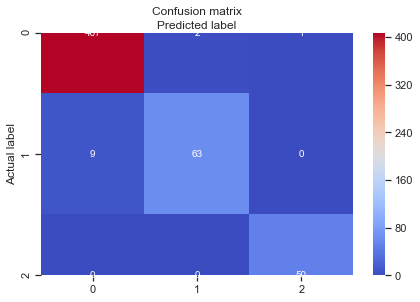

In [11]:
class_names=[1,2,3]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [12]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9774436090225563


In [13]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)
auc = multiclass_roc_auc_score(y_test, y_pred, average="macro")
print("Area under curve : ", auc)

Area under curve :  0.9645816533570587


<h1> Now we will try by Standardization <h1>

In [14]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [16]:
logreg1 = LogisticRegression()
logreg1.fit(x_train,y_train)
y_pred1=logreg1.predict(x_test)

In [17]:
cnf_matrix1 = metrics.confusion_matrix(y_test, y_pred1)
cnf_matrix1

array([[407,   3,   0],
       [  5,  67,   0],
       [  0,   0,  50]], dtype=int64)

In [18]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.9849624060150376


Text(0.5, 257.44, 'Predicted label')

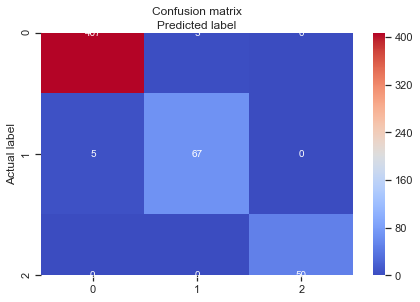

In [19]:
class_names=[1,2,3]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix1), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


<h1>
CONCLUSION
<h1>

<h2>
Accuracy after Standardization is 98% and before it is 85%, Hence standardization improved the result
</h2>